In [1]:
directory = "./BBC/"

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score
import pandas as pd
import os

In [3]:
SamplePerClass = {} 
for root, directories, files in os.walk(directory, topdown=False):
    for name in directories:
        counter = 0
        for root2, directories2, files2 in os.walk(os.path.join(root, name), topdown=False):
            for file in files2:
                counter += 1
        SamplePerClass[name] = counter
print(SamplePerClass)

{'entertainment': 386, 'business': 510, 'sport': 511, 'politics': 417, 'tech': 401}


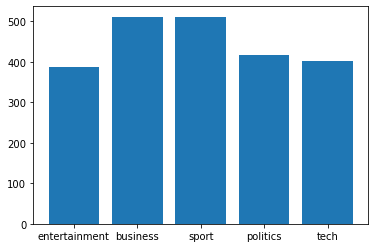

In [4]:
plt.bar(range(len(SamplePerClass)), list(SamplePerClass.values()), align='center')
plt.xticks(range(len(SamplePerClass)), list(SamplePerClass.keys()))
plt.savefig("BBC-distribution.pdf")

In [5]:
data = load_files(directory, encoding="latin1") #returns a scikit "bunch", a holder object (accessed like a dict)

In [6]:
#data preparation 

In [7]:
vectorizer = CountVectorizer()
bagOfWords = vectorizer.fit_transform(data.data) #gather all words and assign indices
bagOfWords = vectorizer.transform(data.data) #assign word counts
bagOfWords.shape
#bag of words is a matrix where 
    #the colomns are the vocabulary words
    #the rows are the number of total documents


(2225, 29421)

In [8]:
X_train_vectors, X_test_vectors, y_train_vectors, y_test_vectors = train_test_split(bagOfWords, data.target, train_size=0.80, test_size=0.20, random_state=None)
X_train_vectors.shape

(1780, 29421)

In [9]:
NB_Cls = MultinomialNB()
NB_Cls.fit(X_train_vectors, y_train_vectors)
predicted = NB_Cls.predict(X_test_vectors)

In [10]:
output = open("bbc-performance.txt","w")

In [11]:
output.write("(a)\n")
output.write("*****************************************\n")
output.write("Multinomial Naive Bayes classifier, try 1\n")
output.write("*****************************************\n")

42

In [12]:
output.write("\n(b)\n")

cm = metrics.confusion_matrix(y_test_vectors, predicted)
print(cm)
output.write(str(cm) + "\n")

[[ 92   1   1   0   2]
 [  0  68   2   0   1]
 [  0   1  80   0   0]
 [  0   0   0 106   0]
 [  2   0   0   0  89]]


116

In [13]:
output.write("\n(c)\n")

cr = classification_report(y_test_vectors, predicted, target_names=data.target_names)
print(cr)
output.write(cr)

               precision    recall  f1-score   support

     business       0.98      0.96      0.97        96
entertainment       0.97      0.96      0.96        71
     politics       0.96      0.99      0.98        81
        sport       1.00      1.00      1.00       106
         tech       0.97      0.98      0.97        91

     accuracy                           0.98       445
    macro avg       0.98      0.98      0.98       445
 weighted avg       0.98      0.98      0.98       445



497

In [14]:
output.write("\n(d)\n")

asc = "Accuracy Score = " + str(accuracy_score(y_test_vectors, predicted))
f1_macro = "Macro F1 Score = " +str(f1_score(y_test_vectors, predicted, average='macro'))
f1_weighted = "Weighted F1 Score = " +str(f1_score(y_test_vectors, predicted, average='weighted'))

print(asc)
print(f1_macro)
print(f1_weighted)

output.write(asc)
output.write("\n")
output.write(f1_macro)
output.write("\n")
output.write(f1_weighted)
output.write("\n")

Accuracy Score = 0.9775280898876404
Macro F1 Score = 0.9762494822899507
Weighted F1 Score = 0.9775027910163279


1

In [15]:
output.write("\n(e)\n")

print("Prior Probability for each class:\n")
output.write("Prior Probability for each class:\n")
priorsDic = dict(zip(data.target_names, NB_Cls.class_log_prior_))

avr =0
sums =0
for key in priorsDic:
    sums += len(key)
avr = sums / len(priorsDic)

for key in priorsDic:
    if (len(key) < int(avr)):
        s = str(key) + '\t\t = ' + str(priorsDic[key]) + '\n'
    else:
        s = str(key) + '\t = ' + str(priorsDic[key]) + '\n'
    print(s)
    output.write(str(s))



Prior Probability for each class:

business	 = -1.4585026694608167

entertainment	 = -1.7317960044604979

politics	 = -1.6672574833229268

sport		 = -1.4804815761795922

tech		 = -1.7477963458069388



In [16]:
output.write("\n(f)\n")

vocabulary = len(vectorizer.vocabulary_)
    
print("Size of vocabulary: " + str(vocabulary) + " words")
output.write("Size of vocabulary: " + str(vocabulary) + " words")


Size of vocabulary: 29421 words


31

In [17]:
output.write("\n(g)\n")

ClassDict = {} 
for root, directories, files in os.walk(directory, topdown=False):
    for name in directories:
        value = []
        for root2, directories2, files2 in os.walk(os.path.join(root, name), topdown=False):
            for file in files2:
                f = open(os.path.join(root2, file), "r", encoding="latin1")
                value.append(f.read())
        ClassDict[name] = value

classDicTotal = {}
for className in ClassDict:
    OutputStr = ""
    OutputStr += className
    classVectorizer = CountVectorizer()
    classBOW = classVectorizer.fit_transform(ClassDict[className]) #builds a matrix of feature/indices and their occurence
    
    dfclassBOW = pd.DataFrame(classBOW.todense(), columns=classVectorizer.get_feature_names())
    dfclassBOWSum = dfclassBOW.sum() #outputs a dataframe obj of counts of all words
    Classtotal = dfclassBOWSum.sum()
    OutputStr += ": " + str(Classtotal) + "\n"
    classDicTotal[className] = Classtotal
    
    print(OutputStr)
    output.write(OutputStr)

entertainment: 124893

business: 164663

sport: 162953

politics: 185208

tech: 198640



In [18]:
output.write("\n(h)\n")
   
dfBagOfWords = pd.DataFrame(bagOfWords.todense(), columns=vectorizer.get_feature_names())
dfSum = dfBagOfWords.sum() #outputs a dataframe obj of counts of all words
totalSum = dfSum.sum()
    
print("Word-tokens in the corpus: " + str(totalSum) + " words")
output.write("Word-tokens in the corpus: " + str(totalSum) + " words")

Word-tokens in the corpus: 836357 words


39

In [19]:
output.write("\n(i)\n")
   
for className in ClassDict:
    OutputStr = ""
    OutputStr += className
    classVectorizer = CountVectorizer()
    classBOW = classVectorizer.fit_transform(ClassDict[className]) 
    
    dfclassBOW = pd.DataFrame(classBOW.todense(), columns=classVectorizer.get_feature_names())
    dfclassBOWSum = dfclassBOW.sum() 
    Classtotal = dfclassBOWSum.sum()
    dfDiff = dfSum.sub(dfclassBOWSum)
    
    counter = 0
    for i in dfDiff.index:
        if math.isnan(dfDiff[i]):
            counter += 1
    OutputStr += ": " + str(counter) + " words with frequence of zero or, {0:.2f}%".format(counter/totalSum * 100) + "\n"
    
    print(OutputStr)
    output.write(OutputStr)
    

entertainment: 17746 words with frequence of zero or, 2.12%

business: 17538 words with frequence of zero or, 2.10%

sport: 18850 words with frequence of zero or, 2.25%

politics: 18201 words with frequence of zero or, 2.18%

tech: 17323 words with frequence of zero or, 2.07%



In [20]:
output.write("\n(j)\n")
   
dfBagOfWords = pd.DataFrame(bagOfWords.todense(), columns=vectorizer.get_feature_names())
dfSum = dfBagOfWords.sum() #outputs a dataframe obj of counts of all words
totalSum = dfSum.sum()

counter = 0;
for i in dfSum.index:
    if dfSum[i] == 1:
        counter += 1
    
print("There are " + str(counter) + " words with a frequency of 1 in the corpus or " +  
      "{0:.2f}%".format(counter/totalSum * 100))
output.write("There are " + str(counter) + " words with a frequency of 1 in the corpus or " +  
      "{0:.2f}%".format(counter/totalSum * 100))

There are 10005 words with a frequency of 1 in the corpus or 1.20%


66

In [21]:
output.write("\n(j)\n")
   
dfBagOfWords = pd.DataFrame(bagOfWords.todense(), columns=vectorizer.get_feature_names())
dfSum = dfBagOfWords.sum() #outputs a dataframe obj of counts of all words
totalSum = dfSum.sum()

counter = 0;
for i in dfSum.index:
    if dfSum[i] == 1:
        counter += 1
    
print("There are " + str(counter) + " words with a frequency of 1 in the corpus or " +  
      "{0:.2f}%".format(counter/totalSum * 100))
output.write("There are " + str(counter) + " words with a frequency of 1 in the corpus or " +  
      "{0:.2f}%".format(counter/totalSum * 100))

There are 10005 words with a frequency of 1 in the corpus or 1.20%


66

In [22]:
output.write("\n(k)\n")
   
popWords = dfSum.nlargest(2)
outputStr = ""

for className in ClassDict:
    OutputStr = ""
    OutputStr += className
    classVectorizer = CountVectorizer()
    classBOW = classVectorizer.fit_transform(ClassDict[className]) 
    
    dfclassBOW = pd.DataFrame(classBOW.todense(), columns=classVectorizer.get_feature_names())
    dfclassBOWSum = dfclassBOW.sum() 
    Classtotal = dfclassBOWSum.sum()
    
    
    for i in popWords.index:
        outputStr += str(className) + " => " + str(i) + " " + str(math.log(dfclassBOWSum[i]/Classtotal)) + "\n"
    outputStr += "\n"

print(outputStr)
output.write(outputStr)

entertainment => the -2.7149437879850633
entertainment => to -3.7617126856825998

business => the -2.722597113359981
business => to -3.477409294065489

sport => the -2.8257787746847027
sport => to -3.541441174105334

politics => the -2.7213559022305507
politics => to -3.429053604052196

tech => the -2.8313071877023757
tech => to -3.435352413042588




351

In [23]:
NB_Cls = MultinomialNB()
NB_Cls.fit(X_train_vectors, y_train_vectors)
predicted = NB_Cls.predict(X_test_vectors)

output.write("(a)\n")
output.write("*****************************************\n")
output.write("Multinomial Naive Bayes classifier, try 2\n")
output.write("*****************************************\n")

output.write("\n(b)\n")

cm = metrics.confusion_matrix(y_test_vectors, predicted)
print(cm)
output.write(str(cm) + "\n")

output.write("\n(c)\n")

cr = classification_report(y_test_vectors, predicted, target_names=data.target_names)
print(cr)
output.write(cr)

output.write("\n(d)\n")

asc = "Accuracy Score = " + str(accuracy_score(y_test_vectors, predicted))
f1_macro = "Macro F1 Score = " +str(f1_score(y_test_vectors, predicted, average='macro'))
f1_weighted = "Weighted F1 Score = " +str(f1_score(y_test_vectors, predicted, average='weighted'))

print(asc)
print(f1_macro)
print(f1_weighted)

output.write(asc)
output.write("\n")
output.write(f1_macro)
output.write("\n")
output.write(f1_weighted)
output.write("\n")

output.write("\n(e)\n")

print("Prior Probability for each class:\n")
output.write("Prior Probability for each class:\n")
priorsDic = dict(zip(data.target_names, NB_Cls.class_log_prior_))

avr =0
sums =0
for key in priorsDic:
    sums += len(key)
avr = sums / len(priorsDic)

for key in priorsDic:
    if (len(key) < int(avr)):
        s = str(key) + '\t\t = ' + str(priorsDic[key]) + '\n'
    else:
        s = str(key) + '\t = ' + str(priorsDic[key]) + '\n'
    print(s)
    output.write(str(s))

output.write("\n(f)\n")

vocabulary = len(vectorizer.vocabulary_)
    
print("Size of vocabulary: " + str(vocabulary) + " words")
output.write("Size of vocabulary: " + str(vocabulary) + " words")


output.write("\n(g)\n")

ClassDict = {} 
for root, directories, files in os.walk(directory, topdown=False):
    for name in directories:
        value = []
        for root2, directories2, files2 in os.walk(os.path.join(root, name), topdown=False):
            for file in files2:
                f = open(os.path.join(root2, file), "r", encoding="latin1")
                value.append(f.read())
        ClassDict[name] = value

classDicTotal = {}
for className in ClassDict:
    OutputStr = ""
    OutputStr += className
    classVectorizer = CountVectorizer()
    classBOW = classVectorizer.fit_transform(ClassDict[className]) #builds a matrix of feature/indices and their occurence
    
    dfclassBOW = pd.DataFrame(classBOW.todense(), columns=classVectorizer.get_feature_names())
    dfclassBOWSum = dfclassBOW.sum() #outputs a dataframe obj of counts of all words
    Classtotal = dfclassBOWSum.sum()
    OutputStr += ": " + str(Classtotal) + "\n"
    classDicTotal[className] = Classtotal
    
    print(OutputStr)
    output.write(OutputStr)
    
output.write("\n(h)\n")
   
dfBagOfWords = pd.DataFrame(bagOfWords.todense(), columns=vectorizer.get_feature_names())
dfSum = dfBagOfWords.sum() #outputs a dataframe obj of counts of all words
totalSum = dfSum.sum()
    
print("Word-tokens in the corpus: " + str(totalSum) + " words")
output.write("Word-tokens in the corpus: " + str(totalSum) + " words")

output.write("\n(i)\n")
   
for className in ClassDict:
    OutputStr = ""
    OutputStr += className
    classVectorizer = CountVectorizer()
    classBOW = classVectorizer.fit_transform(ClassDict[className]) 
    
    dfclassBOW = pd.DataFrame(classBOW.todense(), columns=classVectorizer.get_feature_names())
    dfclassBOWSum = dfclassBOW.sum() 
    Classtotal = dfclassBOWSum.sum()
    dfDiff = dfSum.sub(dfclassBOWSum)
    
    counter = 0
    for i in dfDiff.index:
        if math.isnan(dfDiff[i]):
            counter += 1
    OutputStr += ": " + str(counter) + " words with frequence of zero or, {0:.2f}%".format(counter/totalSum * 100) + "\n"
    
    print(OutputStr)
    output.write(OutputStr)
    
output.write("\n(j)\n")
   
dfBagOfWords = pd.DataFrame(bagOfWords.todense(), columns=vectorizer.get_feature_names())
dfSum = dfBagOfWords.sum() #outputs a dataframe obj of counts of all words
totalSum = dfSum.sum()

counter = 0;
for i in dfSum.index:
    if dfSum[i] == 1:
        counter += 1
    
print("There are " + str(counter) + " words with a frequency of 1 in the corpus or " +  
      "{0:.2f}%".format(counter/totalSum * 100))
output.write("There are " + str(counter) + " words with a frequency of 1 in the corpus or " +  
      "{0:.2f}%".format(counter/totalSum * 100))

output.write("\n(j)\n")
   
dfBagOfWords = pd.DataFrame(bagOfWords.todense(), columns=vectorizer.get_feature_names())
dfSum = dfBagOfWords.sum() #outputs a dataframe obj of counts of all words
totalSum = dfSum.sum()

counter = 0;
for i in dfSum.index:
    if dfSum[i] == 1:
        counter += 1
    
print("There are " + str(counter) + " words with a frequency of 1 in the corpus or " +  
      "{0:.2f}%".format(counter/totalSum * 100))
output.write("There are " + str(counter) + " words with a frequency of 1 in the corpus or " +  
      "{0:.2f}%".format(counter/totalSum * 100))

output.write("\n(k)\n")
   
popWords = dfSum.nlargest(2)
outputStr = ""

for className in ClassDict:
    OutputStr = ""
    OutputStr += className
    classVectorizer = CountVectorizer()
    classBOW = classVectorizer.fit_transform(ClassDict[className]) 
    
    dfclassBOW = pd.DataFrame(classBOW.todense(), columns=classVectorizer.get_feature_names())
    dfclassBOWSum = dfclassBOW.sum() 
    Classtotal = dfclassBOWSum.sum()
    
    
    for i in popWords.index:
        outputStr += str(className) + " => " + str(i) + " " + str(math.log(dfclassBOWSum[i]/Classtotal)) + "\n"
    outputStr += "\n"

print(outputStr)
output.write(outputStr)

[[ 92   1   1   0   2]
 [  0  68   2   0   1]
 [  0   1  80   0   0]
 [  0   0   0 106   0]
 [  2   0   0   0  89]]
               precision    recall  f1-score   support

     business       0.98      0.96      0.97        96
entertainment       0.97      0.96      0.96        71
     politics       0.96      0.99      0.98        81
        sport       1.00      1.00      1.00       106
         tech       0.97      0.98      0.97        91

     accuracy                           0.98       445
    macro avg       0.98      0.98      0.98       445
 weighted avg       0.98      0.98      0.98       445

Accuracy Score = 0.9775280898876404
Macro F1 Score = 0.9762494822899507
Weighted F1 Score = 0.9775027910163279
Prior Probability for each class:

business	 = -1.4585026694608167

entertainment	 = -1.7317960044604979

politics	 = -1.6672574833229268

sport		 = -1.4804815761795922

tech		 = -1.7477963458069388

Size of vocabulary: 29421 words
entertainment: 124893

business: 164663

sp

351

In [24]:
NB_Cls = MultinomialNB(alpha=0.0001)
NB_Cls.fit(X_train_vectors, y_train_vectors)
predicted = NB_Cls.predict(X_test_vectors)

output.write("(a)\n")
output.write("**************************************************************\n")
output.write("Multinomial Naive Bayes classifier, try 3 (smoothing 0.0001\n")
output.write("**************************************************************\n")

output.write("\n(b)\n")

cm = metrics.confusion_matrix(y_test_vectors, predicted)
print(cm)
output.write(str(cm) + "\n")

output.write("\n(c)\n")

cr = classification_report(y_test_vectors, predicted, target_names=data.target_names)
print(cr)
output.write(cr)

output.write("\n(d)\n")

asc = "Accuracy Score = " + str(accuracy_score(y_test_vectors, predicted))
f1_macro = "Macro F1 Score = " +str(f1_score(y_test_vectors, predicted, average='macro'))
f1_weighted = "Weighted F1 Score = " +str(f1_score(y_test_vectors, predicted, average='weighted'))

print(asc)
print(f1_macro)
print(f1_weighted)

output.write(asc)
output.write("\n")
output.write(f1_macro)
output.write("\n")
output.write(f1_weighted)
output.write("\n")

output.write("\n(e)\n")

print("Prior Probability for each class:\n")
output.write("Prior Probability for each class:\n")
priorsDic = dict(zip(data.target_names, NB_Cls.class_log_prior_))

avr =0
sums =0
for key in priorsDic:
    sums += len(key)
avr = sums / len(priorsDic)

for key in priorsDic:
    if (len(key) < int(avr)):
        s = str(key) + '\t\t = ' + str(priorsDic[key]) + '\n'
    else:
        s = str(key) + '\t = ' + str(priorsDic[key]) + '\n'
    print(s)
    output.write(str(s))

output.write("\n(f)\n")

vocabulary = len(vectorizer.vocabulary_)
    
print("Size of vocabulary: " + str(vocabulary) + " words")
output.write("Size of vocabulary: " + str(vocabulary) + " words")


output.write("\n(g)\n")

ClassDict = {} 
for root, directories, files in os.walk(directory, topdown=False):
    for name in directories:
        value = []
        for root2, directories2, files2 in os.walk(os.path.join(root, name), topdown=False):
            for file in files2:
                f = open(os.path.join(root2, file), "r", encoding="latin1")
                value.append(f.read())
        ClassDict[name] = value

classDicTotal = {}
for className in ClassDict:
    OutputStr = ""
    OutputStr += className
    classVectorizer = CountVectorizer()
    classBOW = classVectorizer.fit_transform(ClassDict[className]) #builds a matrix of feature/indices and their occurence
    
    dfclassBOW = pd.DataFrame(classBOW.todense(), columns=classVectorizer.get_feature_names())
    dfclassBOWSum = dfclassBOW.sum() #outputs a dataframe obj of counts of all words
    Classtotal = dfclassBOWSum.sum()
    OutputStr += ": " + str(Classtotal) + "\n"
    classDicTotal[className] = Classtotal
    
    print(OutputStr)
    output.write(OutputStr)
    
output.write("\n(h)\n")
   
dfBagOfWords = pd.DataFrame(bagOfWords.todense(), columns=vectorizer.get_feature_names())
dfSum = dfBagOfWords.sum() #outputs a dataframe obj of counts of all words
totalSum = dfSum.sum()
    
print("Word-tokens in the corpus: " + str(totalSum) + " words")
output.write("Word-tokens in the corpus: " + str(totalSum) + " words")

output.write("\n(i)\n")
   
for className in ClassDict:
    OutputStr = ""
    OutputStr += className
    classVectorizer = CountVectorizer()
    classBOW = classVectorizer.fit_transform(ClassDict[className]) 
    
    dfclassBOW = pd.DataFrame(classBOW.todense(), columns=classVectorizer.get_feature_names())
    dfclassBOWSum = dfclassBOW.sum() 
    Classtotal = dfclassBOWSum.sum()
    dfDiff = dfSum.sub(dfclassBOWSum)
    
    counter = 0
    for i in dfDiff.index:
        if math.isnan(dfDiff[i]):
            counter += 1
    OutputStr += ": " + str(counter) + " words with frequence of zero or, {0:.2f}%".format(counter/totalSum * 100) + "\n"
    
    print(OutputStr)
    output.write(OutputStr)
    
output.write("\n(j)\n")
   
dfBagOfWords = pd.DataFrame(bagOfWords.todense(), columns=vectorizer.get_feature_names())
dfSum = dfBagOfWords.sum() #outputs a dataframe obj of counts of all words
totalSum = dfSum.sum()

counter = 0;
for i in dfSum.index:
    if dfSum[i] == 1:
        counter += 1
    
print("There are " + str(counter) + " words with a frequency of 1 in the corpus or " +  
      "{0:.2f}%".format(counter/totalSum * 100))
output.write("There are " + str(counter) + " words with a frequency of 1 in the corpus or " +  
      "{0:.2f}%".format(counter/totalSum * 100))

output.write("\n(j)\n")
   
dfBagOfWords = pd.DataFrame(bagOfWords.todense(), columns=vectorizer.get_feature_names())
dfSum = dfBagOfWords.sum() #outputs a dataframe obj of counts of all words
totalSum = dfSum.sum()

counter = 0;
for i in dfSum.index:
    if dfSum[i] == 1:
        counter += 1
    
print("There are " + str(counter) + " words with a frequency of 1 in the corpus or " +  
      "{0:.2f}%".format(counter/totalSum * 100))
output.write("There are " + str(counter) + " words with a frequency of 1 in the corpus or " +  
      "{0:.2f}%".format(counter/totalSum * 100))

output.write("\n(k)\n")
   
popWords = dfSum.nlargest(2)
outputStr = ""

for className in ClassDict:
    OutputStr = ""
    OutputStr += className
    classVectorizer = CountVectorizer()
    classBOW = classVectorizer.fit_transform(ClassDict[className]) 
    
    dfclassBOW = pd.DataFrame(classBOW.todense(), columns=classVectorizer.get_feature_names())
    dfclassBOWSum = dfclassBOW.sum() 
    Classtotal = dfclassBOWSum.sum()
    
    
    for i in popWords.index:
        outputStr += str(className) + " => " + str(i) + " " + str(math.log(dfclassBOWSum[i]/Classtotal)) + "\n"
    outputStr += "\n"

print(outputStr)
output.write(outputStr)

[[ 92   1   0   0   3]
 [  0  68   2   0   1]
 [  3   0  78   0   0]
 [  0   0   0 106   0]
 [  3   1   0   0  87]]
               precision    recall  f1-score   support

     business       0.94      0.96      0.95        96
entertainment       0.97      0.96      0.96        71
     politics       0.97      0.96      0.97        81
        sport       1.00      1.00      1.00       106
         tech       0.96      0.96      0.96        91

     accuracy                           0.97       445
    macro avg       0.97      0.97      0.97       445
 weighted avg       0.97      0.97      0.97       445

Accuracy Score = 0.9685393258426966
Macro F1 Score = 0.9675961341524918
Weighted F1 Score = 0.9685804223482879
Prior Probability for each class:

business	 = -1.4585026694608167

entertainment	 = -1.7317960044604979

politics	 = -1.6672574833229268

sport		 = -1.4804815761795922

tech		 = -1.7477963458069388

Size of vocabulary: 29421 words
entertainment: 124893

business: 164663

sp

351

In [25]:
NB_Cls = MultinomialNB(alpha=0.9)
NB_Cls.fit(X_train_vectors, y_train_vectors)
predicted = NB_Cls.predict(X_test_vectors)

output.write("(a)\n")
output.write("**************************************************************\n")
output.write("Multinomial Naive Bayes classifier, try 4 (smoothing 0.9\n")
output.write("**************************************************************\n")

output.write("\n(b)\n")

cm = metrics.confusion_matrix(y_test_vectors, predicted)
print(cm)
output.write(str(cm) + "\n")

output.write("\n(c)\n")

cr = classification_report(y_test_vectors, predicted, target_names=data.target_names)
print(cr)
output.write(cr)

output.write("\n(d)\n")

asc = "Accuracy Score = " + str(accuracy_score(y_test_vectors, predicted))
f1_macro = "Macro F1 Score = " +str(f1_score(y_test_vectors, predicted, average='macro'))
f1_weighted = "Weighted F1 Score = " +str(f1_score(y_test_vectors, predicted, average='weighted'))

print(asc)
print(f1_macro)
print(f1_weighted)

output.write(asc)
output.write("\n")
output.write(f1_macro)
output.write("\n")
output.write(f1_weighted)
output.write("\n")

output.write("\n(e)\n")

print("Prior Probability for each class:\n")
output.write("Prior Probability for each class:\n")
priorsDic = dict(zip(data.target_names, NB_Cls.class_log_prior_))

avr =0
sums =0
for key in priorsDic:
    sums += len(key)
avr = sums / len(priorsDic)

for key in priorsDic:
    if (len(key) < int(avr)):
        s = str(key) + '\t\t = ' + str(priorsDic[key]) + '\n'
    else:
        s = str(key) + '\t = ' + str(priorsDic[key]) + '\n'
    print(s)
    output.write(str(s))

output.write("\n(f)\n")

vocabulary = len(vectorizer.vocabulary_)
    
print("Size of vocabulary: " + str(vocabulary) + " words")
output.write("Size of vocabulary: " + str(vocabulary) + " words")


output.write("\n(g)\n")

ClassDict = {} 
for root, directories, files in os.walk(directory, topdown=False):
    for name in directories:
        value = []
        for root2, directories2, files2 in os.walk(os.path.join(root, name), topdown=False):
            for file in files2:
                f = open(os.path.join(root2, file), "r", encoding="latin1")
                value.append(f.read())
        ClassDict[name] = value

classDicTotal = {}
for className in ClassDict:
    OutputStr = ""
    OutputStr += className
    classVectorizer = CountVectorizer()
    classBOW = classVectorizer.fit_transform(ClassDict[className]) #builds a matrix of feature/indices and their occurence
    
    dfclassBOW = pd.DataFrame(classBOW.todense(), columns=classVectorizer.get_feature_names())
    dfclassBOWSum = dfclassBOW.sum() #outputs a dataframe obj of counts of all words
    Classtotal = dfclassBOWSum.sum()
    OutputStr += ": " + str(Classtotal) + "\n"
    classDicTotal[className] = Classtotal
    
    print(OutputStr)
    output.write(OutputStr)
    
output.write("\n(h)\n")
   
dfBagOfWords = pd.DataFrame(bagOfWords.todense(), columns=vectorizer.get_feature_names())
dfSum = dfBagOfWords.sum() #outputs a dataframe obj of counts of all words
totalSum = dfSum.sum()
    
print("Word-tokens in the corpus: " + str(totalSum) + " words")
output.write("Word-tokens in the corpus: " + str(totalSum) + " words")

output.write("\n(i)\n")
   
for className in ClassDict:
    OutputStr = ""
    OutputStr += className
    classVectorizer = CountVectorizer()
    classBOW = classVectorizer.fit_transform(ClassDict[className]) 
    
    dfclassBOW = pd.DataFrame(classBOW.todense(), columns=classVectorizer.get_feature_names())
    dfclassBOWSum = dfclassBOW.sum() 
    Classtotal = dfclassBOWSum.sum()
    dfDiff = dfSum.sub(dfclassBOWSum)
    
    counter = 0
    for i in dfDiff.index:
        if math.isnan(dfDiff[i]):
            counter += 1
    OutputStr += ": " + str(counter) + " words with frequence of zero or, {0:.2f}%".format(counter/totalSum * 100) + "\n"
    
    print(OutputStr)
    output.write(OutputStr)
    
output.write("\n(j)\n")
   
dfBagOfWords = pd.DataFrame(bagOfWords.todense(), columns=vectorizer.get_feature_names())
dfSum = dfBagOfWords.sum() #outputs a dataframe obj of counts of all words
totalSum = dfSum.sum()

counter = 0;
for i in dfSum.index:
    if dfSum[i] == 1:
        counter += 1
    
print("There are " + str(counter) + " words with a frequency of 1 in the corpus or " +  
      "{0:.2f}%".format(counter/totalSum * 100))
output.write("There are " + str(counter) + " words with a frequency of 1 in the corpus or " +  
      "{0:.2f}%".format(counter/totalSum * 100))

output.write("\n(j)\n")
   
dfBagOfWords = pd.DataFrame(bagOfWords.todense(), columns=vectorizer.get_feature_names())
dfSum = dfBagOfWords.sum() #outputs a dataframe obj of counts of all words
totalSum = dfSum.sum()

counter = 0;
for i in dfSum.index:
    if dfSum[i] == 1:
        counter += 1
    
print("There are " + str(counter) + " words with a frequency of 1 in the corpus or " +  
      "{0:.2f}%".format(counter/totalSum * 100))
output.write("There are " + str(counter) + " words with a frequency of 1 in the corpus or " +  
      "{0:.2f}%".format(counter/totalSum * 100))

output.write("\n(k)\n")
   
popWords = dfSum.nlargest(2)
outputStr = ""

for className in ClassDict:
    OutputStr = ""
    OutputStr += className
    classVectorizer = CountVectorizer()
    classBOW = classVectorizer.fit_transform(ClassDict[className]) 
    
    dfclassBOW = pd.DataFrame(classBOW.todense(), columns=classVectorizer.get_feature_names())
    dfclassBOWSum = dfclassBOW.sum() 
    Classtotal = dfclassBOWSum.sum()
    
    
    for i in popWords.index:
        outputStr += str(className) + " => " + str(i) + " " + str(math.log(dfclassBOWSum[i]/Classtotal)) + "\n"
    outputStr += "\n"

print(outputStr)
output.write(outputStr)

[[ 92   1   1   0   2]
 [  0  68   2   0   1]
 [  0   1  80   0   0]
 [  0   0   0 106   0]
 [  2   0   0   0  89]]
               precision    recall  f1-score   support

     business       0.98      0.96      0.97        96
entertainment       0.97      0.96      0.96        71
     politics       0.96      0.99      0.98        81
        sport       1.00      1.00      1.00       106
         tech       0.97      0.98      0.97        91

     accuracy                           0.98       445
    macro avg       0.98      0.98      0.98       445
 weighted avg       0.98      0.98      0.98       445

Accuracy Score = 0.9775280898876404
Macro F1 Score = 0.9762494822899507
Weighted F1 Score = 0.9775027910163279
Prior Probability for each class:

business	 = -1.4585026694608167

entertainment	 = -1.7317960044604979

politics	 = -1.6672574833229268

sport		 = -1.4804815761795922

tech		 = -1.7477963458069388

Size of vocabulary: 29421 words
entertainment: 124893

business: 164663

sp

351

In [26]:
output.close()

In [27]:
#(b)

print(accuracy_score(y_test_vectors, predicted))
print(classification_report(y_test_vectors, predicted))

0.9775280898876404
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        96
           1       0.97      0.96      0.96        71
           2       0.96      0.99      0.98        81
           3       1.00      1.00      1.00       106
           4       0.97      0.98      0.97        91

    accuracy                           0.98       445
   macro avg       0.98      0.98      0.98       445
weighted avg       0.98      0.98      0.98       445

